# Phase 4 Project Office Hours 12/10

- Recording https://youtu.be/7TMrPNdCzgE

### Time Series Resources


#### **Time Series Resources**
- [Duke University School of Business Guide on Time Series](https://people.duke.edu/~rnau/411home.htm)
    - [Selecting the right I (differencing)](https://people.duke.edu/~rnau/411arim2.htm)
    - [Selecting AR/MA (P,Q) Orders](https://people.duke.edu/~rnau/411arim3.htm)
    - [Summary: Selecting your ARIMA Orders](https://people.duke.edu/~rnau/arimrule.htm)
    
- **`pmdarima.auto_arima`**
    - https://alkaline-ml.com/pmdarima/index.html
    - https://alkaline-ml.com/pmdarima/quickstart.html

# BALTIMORE CRIME DATA

In [67]:
# !pip install -U fsds
# from fsds.imports import *
import fsds as fs

In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Project Notebook Settings
pd.set_option('display.max_columns',0)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')

In [69]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

## PREPROCESSING TO MAKE TIME SERIES

In [70]:
df = fs.datasets.load_ts_baltimore_crime_full()
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
1,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
4,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286604,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
286605,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
286606,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1
286607,07/20/1969,21:00:00,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-77.0,39.0,NaN,NaN,NaN,1


In [71]:
## Make datetime column and drop Date, Time columns
df['datetime'] = pd.to_datetime(df['CrimeDate']+'-'+df['CrimeTime'])
df.drop(columns=['CrimeDate','CrimeTime'],inplace=True)
df

,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,datetime
0,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1,2019-12-14 00:26:00
1,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 07:30:00
2,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019-12-14 14:30:00
3,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 14:15:00
4,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1,2019-12-14 04:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286604,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1978-01-01 10:30:00
286605,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1977-05-01 00:01:00
286606,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1,1975-06-01 00:00:00
286607,2A,5400 ROLAND AVE,RAPE,NaN,OTHER,534,NORTHERN,ROLAND PARK,-77.0,39.0,NaN,NaN,NaN,1,1969-07-20 21:00:00


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286609 entries, 0 to 286608
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeCode        286609 non-null  object        
 1   Location         285342 non-null  object        
 2   Description      286609 non-null  object        
 3   Inside/Outside   254172 non-null  object        
 4   Weapon           60141 non-null   object        
 5   Post             284298 non-null  object        
 6   District         286609 non-null  object        
 7   Neighborhood     276194 non-null  object        
 8   Longitude        285031 non-null  float64       
 9   Latitude         285031 non-null  float64       
 10  Location 1       0 non-null       float64       
 11  Premise          253920 non-null  object        
 12  vri_name1        33866 non-null   object        
 13  Total Incidents  286609 non-null  int64         
 14  datetime         286

In [73]:
df.nunique()

CrimeCode              81
Location            26901
Description            14
Inside/Outside          4
Weapon                  5
Post                  375
District               10
Neighborhood          278
Longitude               4
Latitude                3
Location 1              0
Premise               125
vri_name1               8
Total Incidents         1
datetime           187690
dtype: int64

<AxesSubplot:>

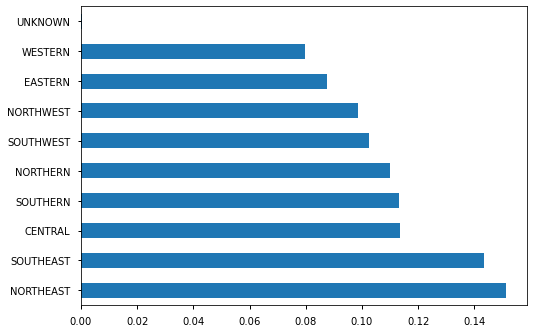

In [74]:
df['District'].value_counts(1,dropna=False).plot(kind='barh')

<AxesSubplot:>

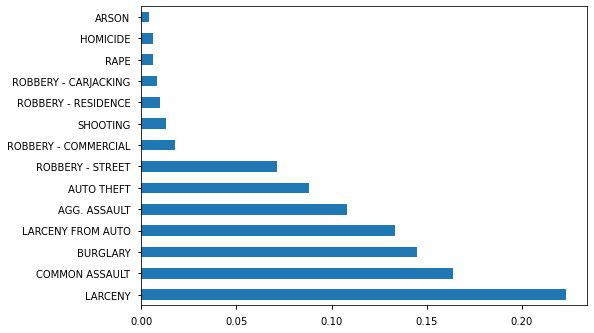

In [75]:
df['Description'].value_counts(1).plot(kind='barh')

# Step 2: Preprocessing - Making Crime Columns

In [76]:
if 'df_orig' not in locals():
    df_orig = df.copy()
else:
    print('df_orig already exists.')

df_orig already exists.


In [77]:
crime_list = list(df['Description'].unique())
crime_list

['HOMICIDE',
 'ROBBERY - STREET',
 'ROBBERY - RESIDENCE',
 'AGG. ASSAULT',
 'BURGLARY',
 'LARCENY FROM AUTO',
 'AUTO THEFT',
 'LARCENY',
 'COMMON ASSAULT',
 'SHOOTING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - CARJACKING',
 'ARSON',
 'RAPE']

In [78]:
## MAKE A COLUMN FOR EACH CRIME
df = df_orig.copy()

for crime in crime_list:
    df[crime] = (df['Description'] == crime).astype(int)

## Make a total crimes columns
df['total_crimes'] = df[crime_list].sum(axis=1)
crime_list.append('total_crimes')

df.set_index('datetime',drop=False,inplace=True)

display(df.isna().sum())
df

CrimeCode                    0
Location                  1267
Description                  0
Inside/Outside           32437
Weapon                  226468
Post                      2311
District                     0
Neighborhood             10415
Longitude                 1578
Latitude                  1578
Location 1              286609
Premise                  32689
vri_name1               252743
Total Incidents              0
datetime                    24
HOMICIDE                     0
ROBBERY - STREET             0
ROBBERY - RESIDENCE          0
AGG. ASSAULT                 0
BURGLARY                     0
LARCENY FROM AUTO            0
AUTO THEFT                   0
LARCENY                      0
COMMON ASSAULT               0
SHOOTING                     0
ROBBERY - COMMERCIAL         0
ROBBERY - CARJACKING         0
ARSON                        0
RAPE                         0
total_crimes                 0
dtype: int64

,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,datetime,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-14 00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1,2019-12-14 00:26:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 07:30:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2019-12-14 14:30:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1,2019-12-14 14:15:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1,2019-12-14 04:03:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1978-01-01 10:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1977-05-01 00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1,1977-05-01 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1975-06-01 00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1,1975-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [79]:
drop_cols = ['CrimeCode', 'Location','Inside/Outside', 'Weapon',
       'Post','Location 1','Description', 'Premise', 'vri_name1',
             'Total Incidents','Neighborhood','Longitude','Latitude']

[df.drop(columns=col,inplace=True) for col in drop_cols if col in df.columns]
df

,District,datetime,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,,
2019-12-14 00:26:00,NORTHERN,2019-12-14 00:26:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 07:30:00,SOUTHERN,2019-12-14 07:30:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:30:00,EASTERN,2019-12-14 14:30:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:15:00,CENTRAL,2019-12-14 14:15:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 04:03:00,NORTHERN,2019-12-14 04:03:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,NORTHEAST,1978-01-01 10:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1977-05-01 00:01:00,NORTHERN,1977-05-01 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1975-06-01 00:00:00,SOUTHWEST,1975-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


## Preprocessing - Resample Data and Choose TIme Period

### Separate Data by District

In [80]:
district_list = df['District'].unique().tolist()
district_list

['NORTHERN',
 'SOUTHERN',
 'EASTERN',
 'CENTRAL',
 'SOUTHEAST',
 'SOUTHWEST',
 'WESTERN',
 'NORTHWEST',
 'NORTHEAST',
 'UNKNOWN']

In [81]:
df

,District,datetime,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,,
2019-12-14 00:26:00,NORTHERN,2019-12-14 00:26:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 07:30:00,SOUTHERN,2019-12-14 07:30:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:30:00,EASTERN,2019-12-14 14:30:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:15:00,CENTRAL,2019-12-14 14:15:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 04:03:00,NORTHERN,2019-12-14 04:03:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,NORTHEAST,1978-01-01 10:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1977-05-01 00:01:00,NORTHERN,1977-05-01 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1975-06-01 00:00:00,SOUTHWEST,1975-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [82]:
## EXAMPLE WORKFLOW TO MAKE INTO LOOP
df_ex = df.groupby('District').get_group('EASTERN')
ts = df_ex['total_crimes'] 
ts

datetime
2019-12-14 14:30:00    1
2019-12-14 10:00:00    1
2019-12-14 05:15:00    1
2019-12-14 09:40:00    1
2019-12-14 18:50:00    1
                      ..
2010-01-01 00:01:00    1
2009-01-01 00:01:00    1
2008-09-26 15:00:00    1
2007-09-04 07:30:00    1
1988-05-01 15:00:00    1
Name: total_crimes, Length: 25047, dtype: int64

In [83]:
df

,District,datetime,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,,
2019-12-14 00:26:00,NORTHERN,2019-12-14 00:26:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 07:30:00,SOUTHERN,2019-12-14 07:30:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:30:00,EASTERN,2019-12-14 14:30:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 14:15:00,CENTRAL,2019-12-14 14:15:00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-12-14 04:03:00,NORTHERN,2019-12-14 04:03:00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01 10:30:00,NORTHEAST,1978-01-01 10:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1977-05-01 00:01:00,NORTHERN,1977-05-01 00:01:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1975-06-01 00:00:00,SOUTHWEST,1975-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [84]:
df_ts= df.groupby(['District']).resample('M').sum()#[crime_list].plot()
df_ts

HOMICIDE  ROBBERY - STREET  ROBBERY - RESIDENCE  AGG. ASSAULT  BURGLARY  ...  ROBBERY - COMMERCIAL  ROBBERY - CARJACKING  ARSON  RAPE  total_crimes
District datetime                                                                             ...                                                                       
CENTRAL  1980-07-31         0                 0                    0             0         0  ...                     0                     0      0     1             1
         1980-08-31         0                 0                    0             0         0  ...                     0                     0      0     0             0
         1980-09-30         0                 0                    0             0         0  ...                     0                     0      0     0             0
         1980-10-31         0                 0                    0             0         0  ...                     0                     0      0     0             0
         1980-11-30         0                 0                    0             0         0  ...                     0                     0      0     0             0
...                       ...               ...                  ...           ...       ...  ...                   ...                   ...    ...   ...           ...
WESTERN  2019-08-31         4                22                    5            59        41  ...                     3                    10      1     0           338
         2019-09-30         2                21                    1            46        38  ...                     1                     5      0     2           265
         2019-10-31         5                17                   10            58        26  ...                     9                     6      2     4           318
         2019-11-30         9                20                    2            31        36  ...                     3                     5      0     2           266
         2019-12-31         2                 4                    0             9         8  ...                     0                     0      1     1            87

[4051 rows x 15 columns]

In [85]:
df_ts.reset_index(level=0,inplace=True)
df_ts

,District,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,
1980-07-31,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1980-08-31,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-09-30,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-10-31,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-11-30,CENTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,WESTERN,4,22,5,59,41,32,27,73,51,10,3,10,1,0,338
2019-09-30,WESTERN,2,21,1,46,38,15,29,44,59,2,1,5,0,2,265
2019-10-31,WESTERN,5,17,10,58,26,21,34,61,53,12,9,6,2,4,318


In [86]:
df_ts=df_ts.sort_index().loc['2015':'2018']#['total_crimes']#,inplace=True)
df_ts

,District,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,
2015-01-31,EASTERN,1,22,10,47,66,20,23,83,55,4,10,2,1,0,344
2015-01-31,NORTHERN,1,16,7,27,50,80,30,103,34,3,11,3,3,2,370
2015-01-31,NORTHWEST,1,22,8,33,90,43,53,81,36,2,13,2,1,1,386
2015-01-31,UNKNOWN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-31,SOUTHERN,1,12,10,32,66,51,31,99,62,4,2,1,2,0,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,SOUTHEAST,1,76,1,57,142,129,42,142,81,11,9,3,0,0,694
2018-12-31,NORTHWEST,3,24,2,49,39,33,48,82,65,13,11,7,1,6,383
2018-12-31,UNKNOWN,0,0,0,0,0,0,1,2,0,0,0,1,0,0,4


In [87]:
px.line(df_ts,color='District')

In [88]:
# df = df.reset_index(level=0)
# df

In [89]:
df_ts

,District,HOMICIDE,ROBBERY - STREET,ROBBERY - RESIDENCE,AGG. ASSAULT,BURGLARY,LARCENY FROM AUTO,AUTO THEFT,LARCENY,COMMON ASSAULT,SHOOTING,ROBBERY - COMMERCIAL,ROBBERY - CARJACKING,ARSON,RAPE,total_crimes
datetime,,,,,,,,,,,,,,,,
2015-01-31,EASTERN,1,22,10,47,66,20,23,83,55,4,10,2,1,0,344
2015-01-31,NORTHERN,1,16,7,27,50,80,30,103,34,3,11,3,3,2,370
2015-01-31,NORTHWEST,1,22,8,33,90,43,53,81,36,2,13,2,1,1,386
2015-01-31,UNKNOWN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-01-31,SOUTHERN,1,12,10,32,66,51,31,99,62,4,2,1,2,0,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,SOUTHEAST,1,76,1,57,142,129,42,142,81,11,9,3,0,0,694
2018-12-31,NORTHWEST,3,24,2,49,39,33,48,82,65,13,11,7,1,6,383
2018-12-31,UNKNOWN,0,0,0,0,0,0,1,2,0,0,0,1,0,0,4


In [90]:
TS = {}
for district in district_list:
    temp_df = df_ts.groupby('District').get_group(district).sort_index()['total_crimes']
    TS[district] = temp_df#df.loc[district]
    

In [91]:
TS.keys()

dict_keys(['NORTHERN', 'SOUTHERN', 'EASTERN', 'CENTRAL', 'SOUTHEAST', 'SOUTHWEST', 'WESTERN', 'NORTHWEST', 'NORTHEAST', 'UNKNOWN'])

In [92]:
TS['EASTERN']

datetime
2015-01-31    344
2015-02-28    239
2015-03-31    277
2015-04-30    315
2015-05-31    392
2015-06-30    363
2015-07-31    409
2015-08-31    349
2015-09-30    329
2015-10-31    343
2015-11-30    337
2015-12-31    368
2016-01-31    290
2016-02-29    262
2016-03-31    314
2016-04-30    385
2016-05-31    393
2016-06-30    359
2016-07-31    332
2016-08-31    380
2016-09-30    427
2016-10-31    430
2016-11-30    391
2016-12-31    341
2017-01-31    403
2017-02-28    341
2017-03-31    374
2017-04-30    439
2017-05-31    450
2017-06-30    464
2017-07-31    443
2017-08-31    427
2017-09-30    373
2017-10-31    407
2017-11-30    327
2017-12-31    352
2018-01-31    322
2018-02-28    324
2018-03-31    366
2018-04-30    346
2018-05-31    375
2018-06-30    360
2018-07-31    383
2018-08-31    344
2018-09-30    330
2018-10-31    387
2018-11-30    352
2018-12-31    412
Name: total_crimes, dtype: int64

In [93]:
df_ts = pd.DataFrame(TS)
df_ts

,NORTHERN,SOUTHERN,EASTERN,CENTRAL,SOUTHEAST,SOUTHWEST,WESTERN,NORTHWEST,NORTHEAST,UNKNOWN
datetime,,,,,,,,,,
2015-01-31,370,373,344,351,521,335,285,386,610,0
2015-02-28,315,251,239,295,336,225,195,277,475,0
2015-03-31,472,356,277,393,396,335,264,308,566,1
2015-04-30,478,359,315,469,502,299,474,363,626,1
2015-05-31,582,449,392,446,640,378,349,467,693,2
2015-06-30,593,500,363,451,661,427,364,426,723,3
2015-07-31,639,507,409,536,713,425,339,428,692,2
2015-08-31,499,544,349,512,747,423,339,434,708,2
2015-09-30,549,460,329,508,702,387,342,364,690,1


In [94]:
df_ts.isna().sum()

NORTHERN     0
SOUTHERN     0
EASTERN      0
CENTRAL      0
SOUTHEAST    0
SOUTHWEST    0
WESTERN      0
NORTHWEST    0
NORTHEAST    0
UNKNOWN      0
dtype: int64

In [95]:
# df_ts.fillna(0,inplace=True)
# df_ts.isna().sum()

<AxesSubplot:xlabel='datetime'>

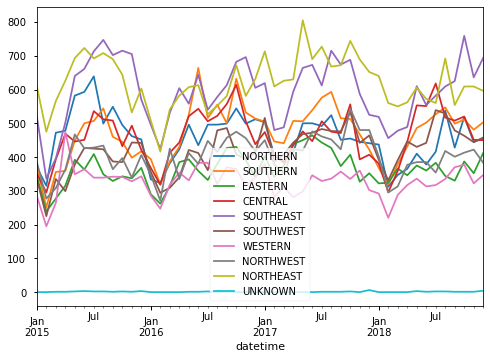

In [96]:
df_ts.plot()

In [97]:
df_ts.drop(columns=['UNKNOWN'],inplace=True)

### Modeling Individual District

In [98]:
district = 'EASTERN'

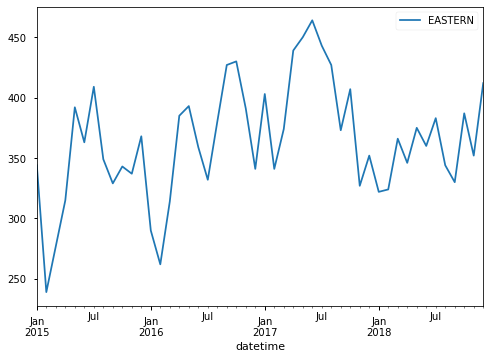

In [99]:
ts = df_ts[district].copy()
ax = ts.plot()
ax.legend()


## ACF and PACF intuition for AR(p) and MA(q)

A quick overview of how higher order models affect the ACF and PACF functions

### AR(p)

Considering a time series that was generated by an autoregression (AR) process with an order of p, we would expect the ACF plot for the AR(p) time series to be strong to a lag of p and remain stagnant for subsequent lag values, trailing off at some point as the effect is weakened. The PACF, on the other hand, describes the direct relationship between an observation and its lag. This generally leads to no correlation for lag values beyond p.

### MA(q)

With a time series generated by a moving average (MA) process with an order q, we would expect the ACF for the MA(q) process to show a strong correlation with recent values up to the lag of q, then an immediate decline to minimal or no correlation. For the PACF, we would expect the plot to show a strong relationship to the lag and then a tailing off to no correlation from the lag onwards.


## ARMA models

Now that we've seen AR and MA models, it is important to note that **there is no reason why AR and MA models would not coexist**. That's where ARMA models come in, which basically means that in this model, a regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part).
Generally, one denotes ARMA as ARMA(p,q).

An ARMA(2,1) model is given by:


 $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$


A short table to summarize ACF and PACF for AR(p), MA(q) and ARMA(p,q):


| Stat | AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |

## Selecting SARIMA params - manually

### Choosing Params Refs:
- https://people.duke.edu/~rnau/arimrule.htm

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot,lag_plot

def plot_acf_pacf(ts, figsize=(10,8),lags=24):
    
    fig,ax = plt.subplots(nrows=3,
                          figsize=figsize)
    
    ## Plot ts
    ts.plot(ax=ax[0])
    
    ## Plot acf, pavf
    plot_acf(ts,ax=ax[1],lags=lags)
    plot_pacf(ts, ax=ax[2],lags=lags) 
    fig.tight_layout()
    
    fig.suptitle(f"District: {ts.name}",y=1.1,fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

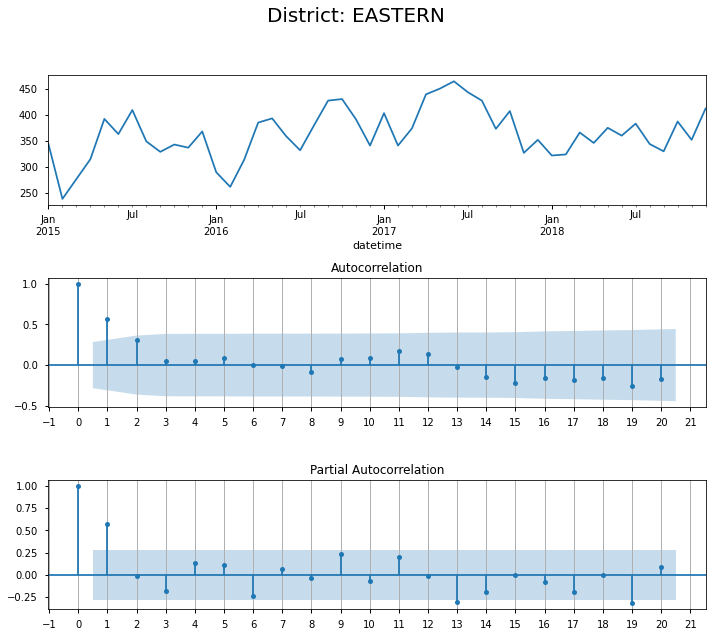

In [101]:
plot_acf_pacf(ts,lags=20);

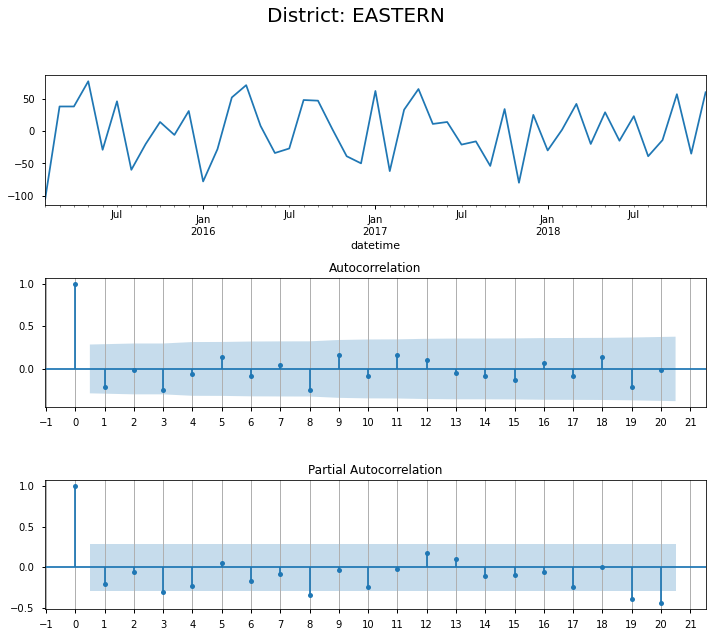

In [102]:
# ts = df_ts['EASTERN']
d = 1
plot_acf_pacf(ts.diff(d).dropna(),lags=20);

In [103]:
# selecting params
d = 1
p = 1
q =1

#### UPDATED INFO ON READING PACF/ACF FOR AR/MA
- **USE ACF TO JUDGE IF MA OR AR COMPONENTS:**
    - If lag 1 is positive: AR
    - If lag 1 is negatige: MA
    
- **PACF is best for picking AR (p)**
- **ACF is best for picking MA(q)**
    - If sharp drop off at lag of k (k= point on x axis) means use an AR model of order k.
    - If slow gradual decline: use MA
    
    
___
INFO FROM LESSONS:

- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lag and tailing off to no correlation afterwards.
   
- Notation is generally ARMA(p,q)
- Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| Param| AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |
    

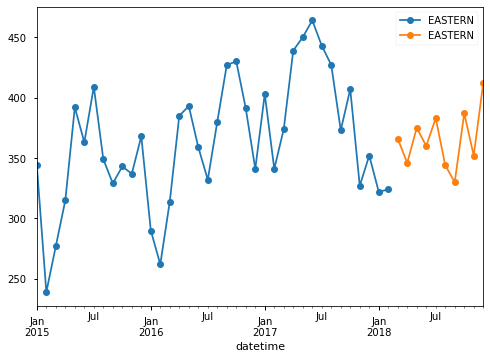

In [104]:
## Train Test Split Index
train_size = 0.8
split_idx = round(len(ts)* train_size)
split_idx

## Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

## Visualize split
fig,ax= plt.subplots()
kws = dict(ax=ax,marker='o')
train.plot(**kws)
test.plot(**kws)
ax.legend(bbox_to_anchor=[1,1])

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                EASTERN   No. Observations:                   38
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -191.694
Date:                Thu, 10 Dec 2020   AIC                            389.388
Time:                        20:13:34   BIC                            394.221
Sample:                    01-31-2015   HQIC                           391.092
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6491      0.242      2.687      0.007       0.176       1.123
ma.L1         -0.9958      1.091     -0.913      0.361      -3.134       1.142
sigma2      1752.1043   1885.660      0.929      0.353   -1943.722    5447.931
===================================================================================
Ljung-Box (Q):                       42.11   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.22   Prob(JB):                         0.51
Heteroskedasticity (H):               0.69   Skew:                            -0.38
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

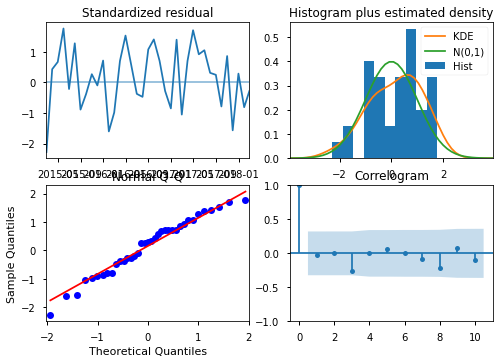

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
## Baseline model from eye-balled params
model = SARIMAX(train,order=(p,d,q),).fit()
display(model.summary())
model.plot_diagnostics();

In [106]:
len(test)

10

### `.forecast` vs `.get_forecast`

In [107]:
from sklearn import metrics
forecast = model.forecast(steps=len(test))
forecast

2018-03-31    336.963419
2018-04-30    345.377746
2018-05-31    350.839338
2018-06-30    354.384361
2018-07-31    356.685372
2018-08-31    358.178919
2018-09-30    359.148353
2018-10-31    359.777596
2018-11-30    360.186026
2018-12-31    360.451132
Freq: M, dtype: float64

In [108]:
forecast = model.get_forecast(steps=len(test))
forecast

In [109]:
forecast.predicted_mean

2018-03-31    336.963419
2018-04-30    345.377746
2018-05-31    350.839338
2018-06-30    354.384361
2018-07-31    356.685372
2018-08-31    358.178919
2018-09-30    359.148353
2018-10-31    359.777596
2018-11-30    360.186026
2018-12-31    360.451132
Freq: M, dtype: float64

In [110]:
forecast.conf_int()

,lower EASTERN,upper EASTERN
2018-03-31,254.110311,419.816528
2018-04-30,245.539037,445.216456
2018-05-31,244.010978,457.667698
2018-06-30,244.338392,464.430330
2018-07-31,245.051043,468.319701
2018-08-31,245.713425,470.644413
2018-09-30,246.224609,472.072097
2018-10-31,246.589307,472.965885
2018-11-30,246.838906,473.533147
2018-12-31,247.005445,473.896818


## Getting and Plotting Forecast

In [111]:
## Getting a forecast
forecast = model.get_forecast(len(test))


def forecast_to_df(forecast,district):
    test_pred = forecast.conf_int()
    test_pred[district] = forecast.predicted_mean
    test_pred.columns = ['lower','upper','prediction']
    return test_pred


pred_df = forecast_to_df(forecast,district)
pred_df

,lower,upper,prediction
2018-03-31,254.110311,419.816528,336.963419
2018-04-30,245.539037,445.216456,345.377746
2018-05-31,244.010978,457.667698,350.839338
2018-06-30,244.338392,464.430330,354.384361
2018-07-31,245.051043,468.319701,356.685372
2018-08-31,245.713425,470.644413,358.178919
2018-09-30,246.224609,472.072097,359.148353
2018-10-31,246.589307,472.965885,359.777596
2018-11-30,246.838906,473.533147,360.186026
2018-12-31,247.005445,473.896818,360.451132


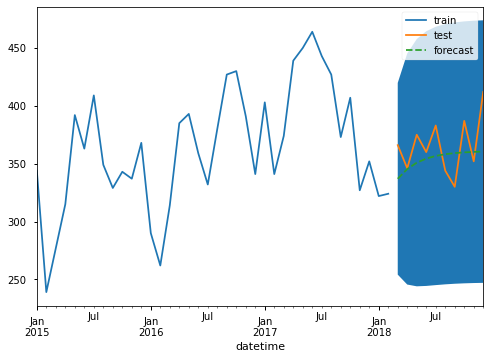

In [112]:
fig, ax = plt.subplots()
train.plot(ax=ax,label='train')
test.plot(ax=ax,label='test')

pred_df['prediction'].plot(ax=ax,label='forecast',ls='--')

ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'])
ax.legend()

(<Figure size 576x396 with 1 Axes>, <AxesSubplot:>)

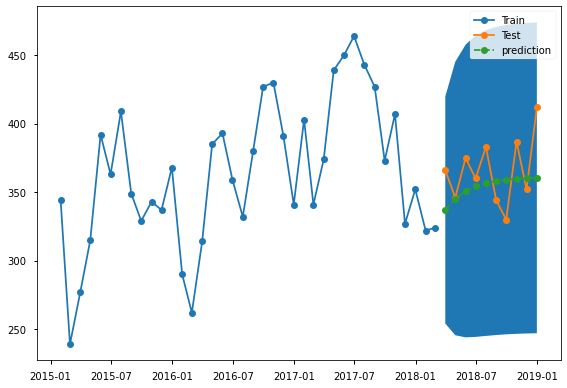

In [113]:
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots()
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['prediction'],label='prediction',ls='--',**kws)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'])
    ax.legend(bbox_to_anchor=[1,1])
    fig.tight_layout()
    return fig,ax

plot_train_test_pred(train,test,pred_df)

In [114]:
# ## Getting a prediction
# prediction = model.get_prediction(start=test.index[0],end=test.index[-1])
# pred_df2 = forecast_to_df(prediction ,district)
# pred_df2

### Selecting params with  `pmdarima`

In [115]:
# !pip install pmdarima

from pmdarima.arima import auto_arima

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -195.466
Date:                Thu, 10 Dec 2020   AIC                            396.932
Time:                        20:13:36   BIC                            401.845
Sample:                             0   HQIC                           398.680
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    137.9571     62.510      2.207      0.027      15.439     260.475
ar.L1          0.6179      0.169      3.648      0.000       0.286       0.950
sigma2      1697.6778    439.234      3.865      0.000     836.796    2558.560
===================================================================================
Ljung-Box (Q):                       36.78   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.48   Prob(JB):                         0.52
Heteroskedasticity (H):               0.72   Skew:                            -0.45
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

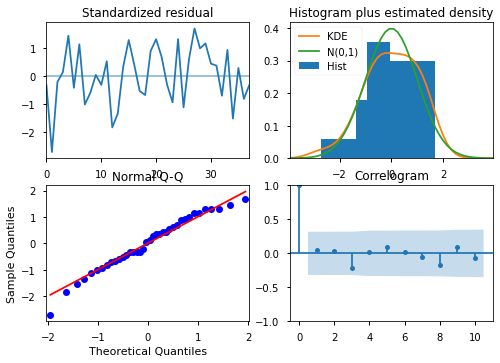

In [116]:
auto_model = auto_arima(train,start_p=0,start_q=0)
display(auto_model.summary())
# help(auto_model
auto_model.plot_diagnostics();

In [117]:
pd.date_range(train.index[-1], periods=10,freq='M')

DatetimeIndex(['2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', freq='M')

In [118]:
train.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [119]:
pred_mean,pred_conf_int = auto_model.predict(return_conf_int=True)
pred_mean 

array([338.14953661, 346.89222389, 352.29413797, 355.6318618 ,
       357.69416791, 358.96842147, 359.7557547 , 360.24223058,
       360.54281331, 360.72853677])

In [120]:
pred_df = pd.DataFrame({'pred':pred_mean, 
                        'conf_int_lower':pred_conf_int[:,0],
                        'conf_int_upper':pred_conf_int[:,1]},
                        index= pd.date_range(test.index[0],
                                                  periods=10,freq='M'))
# auto_model.conf_int()
pred_df

,pred,conf_int_lower,conf_int_upper
2018-03-31,338.149537,257.393364,418.905709
2018-04-30,346.892224,251.964272,441.820176
2018-05-31,352.294138,252.485128,452.103148
2018-06-30,355.631862,254.021220,457.242503
2018-07-31,357.694168,255.404081,459.984255
2018-08-31,358.968421,256.420128,461.516715
2018-09-30,359.755755,257.109056,462.402453
2018-10-31,360.242231,257.557989,462.926472
2018-11-30,360.542813,257.844242,463.241385
2018-12-31,360.728537,258.024495,463.432578


In [121]:
train.index[-1]

Timestamp('2018-02-28 00:00:00')

In [122]:
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': False,
 'trend': None,
 'with_intercept': True}

In [123]:
# res = auto_model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                EASTERN   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -252.247
Date:                Thu, 10 Dec 2020   AIC                            508.494
Time:                        20:13:36   BIC                            512.236
Sample:                    01-31-2015   HQIC                           509.908
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9930      0.018     55.910      0.000       0.958       1.028
sigma2      1964.9471    530.369      3.705      0.000     925.443    3004.452
===================================================================================
Ljung-Box (Q):                       41.17   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.42   Prob(JB):                         0.40
Heteroskedasticity (H):               0.57   Skew:                            -0.31
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

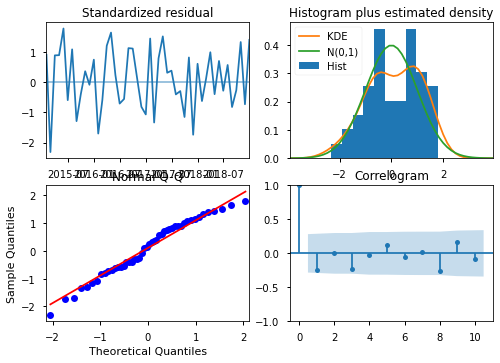

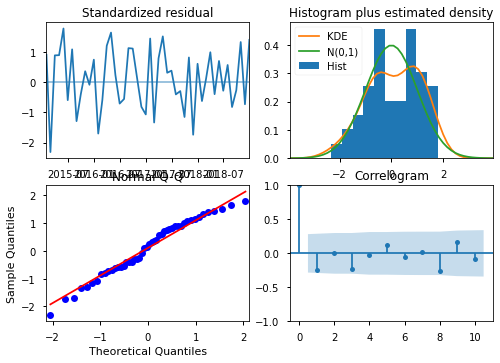

In [124]:
best_model = SARIMAX(ts,order=auto_model.order,
                     seasonal_order=auto_model.seasonal_order).fit()
display(best_model.summary())
best_model.plot_diagnostics()

(<Figure size 576x396 with 1 Axes>, <AxesSubplot:>)

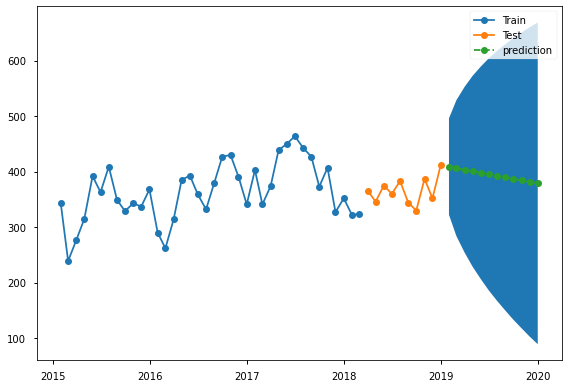

In [125]:
pred = best_model.get_forecast(steps=12)#start=test.index[0],end=test.index[-1])
pred_df = forecast_to_df(pred,district)
display(plot_train_test_pred(train,test,pred_df))

In [126]:
df_ts

,NORTHERN,SOUTHERN,EASTERN,CENTRAL,SOUTHEAST,SOUTHWEST,WESTERN,NORTHWEST,NORTHEAST
datetime,,,,,,,,,
2015-01-31,370,373,344,351,521,335,285,386,610
2015-02-28,315,251,239,295,336,225,195,277,475
2015-03-31,472,356,277,393,396,335,264,308,566
2015-04-30,478,359,315,469,502,299,474,363,626
2015-05-31,582,449,392,446,640,378,349,467,693
2015-06-30,593,500,363,451,661,427,364,426,723
2015-07-31,639,507,409,536,713,425,339,428,692
2015-08-31,499,544,349,512,747,423,339,434,708
2015-09-30,549,460,329,508,702,387,342,364,690


## Implementing in a loop

In [127]:
district_list.remove("UNKNOWN")

NORTHERN


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               NORTHERN   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -212.544
Date:                Thu, 10 Dec 2020   AIC                            429.089
Time:                        20:19:06   BIC                            432.364
Sample:                    01-31-2015   HQIC                           430.254
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9872      0.022     45.033      0.000       0.944       1.030
sigma2      3836.7458    846.794      4.531      0.000    2177.060    5496.432
===================================================================================
Ljung-Box (Q):                       41.21   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.29   Prob(JB):                         0.89
Heteroskedasticity (H):               0.45   Skew:                            -0.14
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

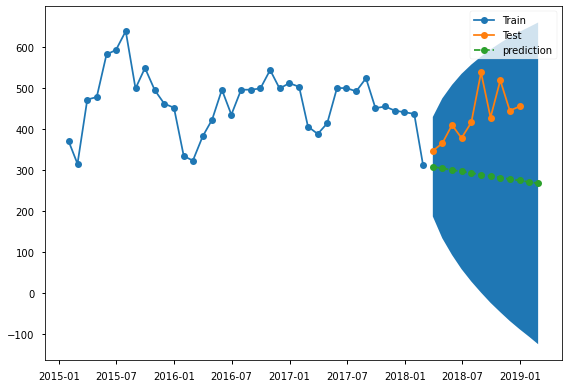

------------------------------------------------------------

SOUTHERN


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               SOUTHERN   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -215.649
Date:                Thu, 10 Dec 2020   AIC                            435.297
Time:                        20:19:07   BIC                            438.572
Sample:                    01-31-2015   HQIC                           436.462
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9856      0.023     43.612      0.000       0.941       1.030
sigma2      4532.7695   1188.821      3.813      0.000    2202.723    6862.817
===================================================================================
Ljung-Box (Q):                       46.80   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.13   Prob(JB):                         0.84
Heteroskedasticity (H):               0.46   Skew:                             0.04
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

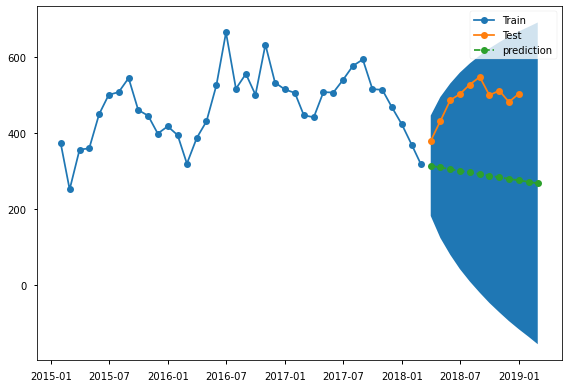

------------------------------------------------------------

EASTERN


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                EASTERN   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -201.513
Date:                Thu, 10 Dec 2020   AIC                            407.027
Time:                        20:19:08   BIC                            410.302
Sample:                    01-31-2015   HQIC                           408.192
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9909      0.021     46.140      0.000       0.949       1.033
sigma2      2127.5041    662.852      3.210      0.001     828.338    3426.670
===================================================================================
Ljung-Box (Q):                       50.14   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.07   Prob(JB):                         0.45
Heteroskedasticity (H):               0.61   Skew:                            -0.31
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

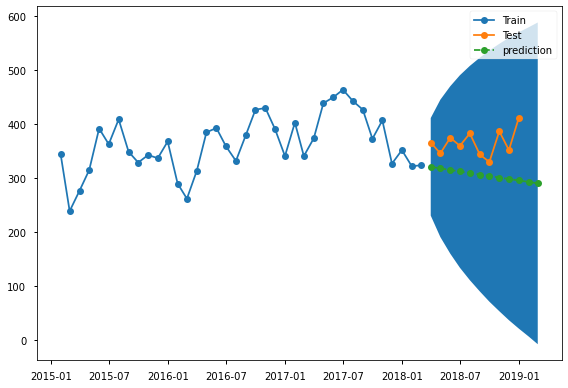

------------------------------------------------------------

CENTRAL


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CENTRAL   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -212.563
Date:                Thu, 10 Dec 2020   AIC                            429.127
Time:                        20:19:08   BIC                            432.402
Sample:                    01-31-2015   HQIC                           430.292
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9863      0.022     44.139      0.000       0.943       1.030
sigma2      3848.3666   1095.731      3.512      0.000    1700.773    5995.961
===================================================================================
Ljung-Box (Q):                       43.60   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.21   Prob(JB):                         0.56
Heteroskedasticity (H):               1.14   Skew:                            -0.35
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

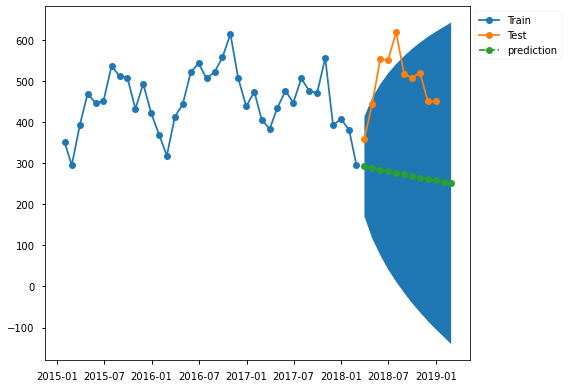

------------------------------------------------------------

SOUTHEAST


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              SOUTHEAST   No. Observations:                   38
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -221.307
Date:                Thu, 10 Dec 2020   AIC                            450.615
Time:                        20:19:09   BIC                            457.165
Sample:                    01-31-2015   HQIC                           452.945
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0483      0.192      5.452      0.000       0.671       1.425
ar.L2         -0.0455      0.256     -0.178      0.859      -0.547       0.456
ar.L3         -0.0145      0.170     -0.086      0.932      -0.347       0.318
sigma2      6055.3060   1811.130      3.343      0.001    2505.557    9605.055
===================================================================================
Ljung-Box (Q):                       47.65   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.11   Prob(JB):                         0.47
Heteroskedasticity (H):               0.67   Skew:                            -0.38
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

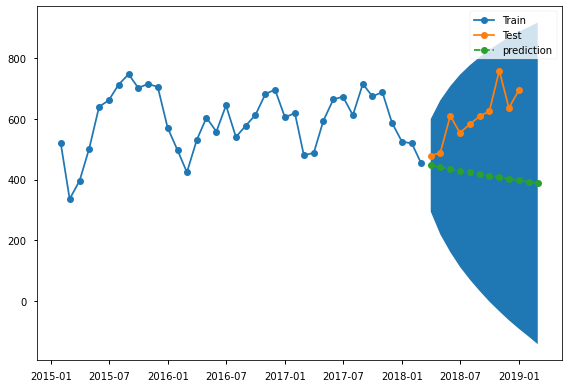

------------------------------------------------------------

SOUTHWEST


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              SOUTHWEST   No. Observations:                   38
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -203.772
Date:                Thu, 10 Dec 2020   AIC                            409.545
Time:                        20:19:10   BIC                            411.156
Sample:                    01-31-2015   HQIC                           410.113
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3558.4447    929.288      3.829      0.000    1737.073    5379.816
===================================================================================
Ljung-Box (Q):                       42.06   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.23   Prob(JB):                         0.86
Heteroskedasticity (H):               0.51   Skew:                            -0.09
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

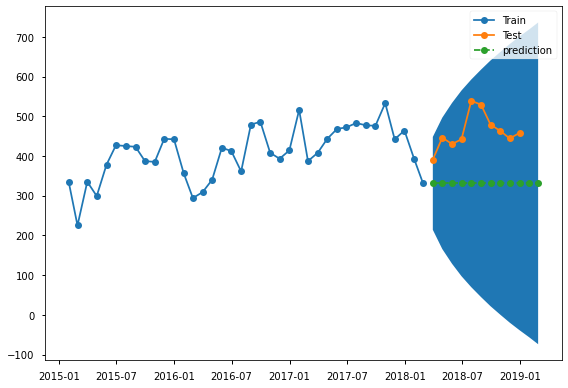

------------------------------------------------------------

WESTERN


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                WESTERN   No. Observations:                   38
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -251.984
Date:                Thu, 10 Dec 2020   AIC                            507.967
Time:                        20:19:10   BIC                            511.242
Sample:                    01-31-2015   HQIC                           509.133
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9960      2.442      0.408      0.683      -3.791       5.783
sigma2      3.068e+04   6.83e+04      0.449      0.653   -1.03e+05    1.65e+05
===================================================================================
Ljung-Box (Q):                      172.00   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.00   Prob(JB):                         0.42
Heteroskedasticity (H):               0.83   Skew:                            -0.45
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

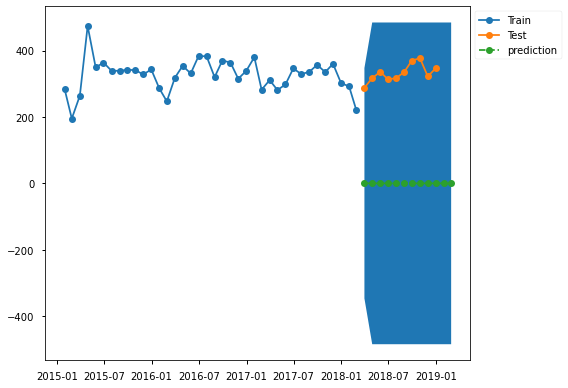

------------------------------------------------------------

NORTHWEST


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              NORTHWEST   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -213.642
Date:                Thu, 10 Dec 2020   AIC                            431.285
Time:                        20:19:11   BIC                            434.560
Sample:                    01-31-2015   HQIC                           432.450
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9850      0.029     33.942      0.000       0.928       1.042
sigma2      4080.3158   1131.068      3.607      0.000    1863.463    6297.168
===================================================================================
Ljung-Box (Q):                       39.97   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.34   Prob(JB):                         0.56
Heteroskedasticity (H):               1.00   Skew:                             0.32
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

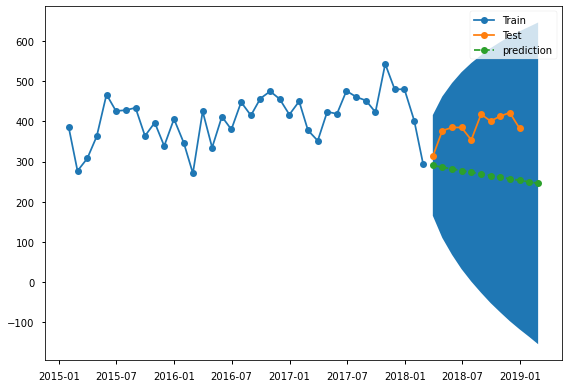

------------------------------------------------------------

NORTHEAST


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              NORTHEAST   No. Observations:                   38
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -219.498
Date:                Thu, 10 Dec 2020   AIC                            442.995
Time:                        20:19:11   BIC                            446.270
Sample:                    01-31-2015   HQIC                           444.160
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9923      0.020     50.275      0.000       0.954       1.031
sigma2      5457.1712   1548.589      3.524      0.000    2421.992    8492.350
===================================================================================
Ljung-Box (Q):                       44.74   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.18   Prob(JB):                         0.69
Heteroskedasticity (H):               1.05   Skew:                             0.02
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

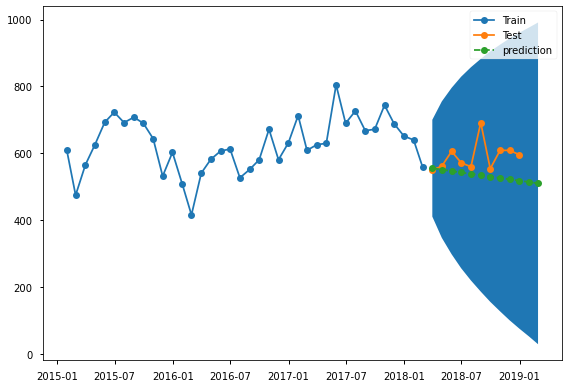

------------------------------------------------------------



In [135]:
RESULTS = {}

for district in district_list:
    print(district)
    
    ## Make empty dict for district data
    district_d = {}
    
    ## Copy Time Series
    ts = df_ts[district].copy()
    
    
    ## Train Test Split Index
    train_size = 0.8
    split_idx = round(len(ts)* train_size)

    ## Split
    train = ts.iloc[:split_idx]
    test = ts.iloc[split_idx:]
    
    
    ## Get best params using auto_arima
    gridsearch_model = auto_arima(train,start_p=0,start_q=0)
    best_model = SARIMAX(train,order=gridsearch_model.order,
                     seasonal_order=gridsearch_model.seasonal_order).fit()
    
    ## Get predictions
    pred  = best_model.get_forecast(steps=12)#start=test.index[0],end=test.index[-1])
    pred_df = forecast_to_df(pred,district)

    ## Save info to dict
    district_d['pred_df'] = pred_df
    district_d['model'] = best_model
    district_d['train'] = train
    district_d['test'] = test
    
    ## Display Results
    display(best_model.summary())
    plot_train_test_pred(train,test,pred_df)
    plt.show()
    
    
    ## Save district dict in RESULTS
    RESULTS[district] = district_d
    print('---'*20,end='\n\n')



In [139]:
RESULTS['EASTERN'].keys()

dict_keys(['pred_df', 'model', 'train', 'test'])

In [143]:
model = RESULTS['EASTERN']['model'].model
# model.fit()""
model

# APPENDIX

## Thiel's U

In [137]:
fs.ihelp(fs.jmi.thiels_U)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def thiels_U(ys_true=None, ys_pred=None,display_equation=True,display_table=True):
    """Calculate's Thiel's U metric for forecasting accuracy.
    Accepts true values and predicted values.
    Returns Thiel's U"""


    from IPython.display import Markdown, Latex, display
    import numpy as np
    display(Markdown(""))
    eqn=" $$U = \\sqrt{\\frac{ \\sum_{t=1 }^{n-1}\\left(\\frac{\\bar{Y}_{t+1} - Y_{t+1}}{Y_t}\\right)^2}{\\sum_{t=1 }^{n-1}\\left(\\frac{Y_{t+1} - Y_{t}}{Y_t}\\right)^2}}$$"

    # url="['Explanation'](https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s03s04.html)"
    markdown_explanation ="|Thiel's U Value | Interpretation |\n\
    | --- | --- |\n\
    | <1 | Forecasting is better than guessing| \n\
    | 1 | Forecasting is about as good as guessing| \n\
    |>1 | Forecasting is worse than guessing| \n"


    if display_equation and display_table:
        display(Latex(eqn),Markdown(markdown_explanation))#, Latex(eqn))
    elif display_equation:
        display(Latex(eqn))
    elif display_table:
        display(Markdown(markdown_explanation))

    if ys_true is None and ys_pred is None:
        return

    # sum_list = []
    num_list=[]
    denom_list=[]
    for t in range(len(ys_true)-1):
        num_exp = (ys_pred[t+1] - ys_true[t+1])/ys_true[t]
        num_list.append([num_exp**2])
        denom_exp = (ys_true[t+1] - ys_true[t])/ys_true[t]
        denom_list.append([denom_exp**2])
    U = np.sqrt( np.sum(num_list) / np.sum(denom_list))
    return U

```

In [ ]:
def model_evaluation(ts_true,ts_pred,show=True,show_u_info=False):
    from sklearn.metrics import mean_squared_error,r2_score

    res= [['Metric','Value']]
    
    res.append(['RMSE', np.sqrt(mean_squared_error(ts_true,ts_pred))])
    
    res.append(['R2',r2_score(ts_true,ts_pred)])
    res.append(["Thiel's U",fs.jmi.thiels_U(ts_true,ts_pred,
                                            display_equation=show_u_info,
                                           display_table=show_u_info)])
    res = pd.DataFrame(res[1:],columns=res[0])#fs.list2df(res)
    
    if show:
        display(res)
    return res
    
def expected_roi(investment, final_value):
    """This function takes in a series of forecasts to predict the return
    on investment spanning the entire forecast."""
    roi = np.round(((final_value - investment) / investment)*100,3)
    return roi
